In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [2]:
%%time
csv_path = r'E:\Datasets\data_const_T_20200716-230921.csv'
d = pd.read_csv(csv_path, delimiter=',', names=['a_mix', 'b_mix',
                                            'b_i', 'sum', 'lnphi'])
d.describe()

Wall time: 1min 35s


,a_mix,b_mix,b_i,sum,lnphi
count,9.237000e+07,9.237000e+07,9.237000e+07,9.237000e+07,9.237000e+07
mean,5.372763e+00,3.400253e-01,3.505000e-01,5.000500e+00,1.202175e+04
std,2.715147e+00,2.025892e-01,2.038120e-01,2.915473e+00,1.511708e+05
min,1.020000e-01,1.000000e-03,1.000000e-03,1.000000e-03,-1.219890e+04
25%,3.031000e+00,1.633939e-01,1.757500e-01,2.500750e+00,-1.000982e+01
50%,5.354000e+00,3.328485e-01,3.505000e-01,5.000500e+00,-2.360367e+00
75%,7.677000e+00,5.164242e-01,5.252500e-01,7.500250e+00,8.813542e+00
max,1.000000e+01,7.000000e-01,7.000000e-01,1.000000e+01,4.361191e+06


In [ ]:
from pandas.plotting import scatter_matrix
d.plot(kind='scatter', x='lnphi', y='a_mix', alpha=0.1)

In [ ]:
d.plot(kind='scatter', x='lnphi', y='b_mix', alpha=0.1)

In [ ]:
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(d.drop(['lnphi'], axis=1))
X = d.drop(['lnphi'], axis=1)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
np.sum(pca.explained_variance_ratio_)

In [ ]:
X_reduced.shape

In [ ]:
# Reduce size
X_reduced_partial, X_reduced_test, y_train_partial, y_train_test = train_test_split(
            X_reduced, d[['lnphi']], test_size=0.9999, random_state=42)

X_partial, X_test, y_train_partial, y_train_test = train_test_split(
    X, d[['lnphi']], test_size=0.9999, random_state=42
)

In [ ]:
X_reduced_partial.shape

In [ ]:
%matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced_partial[:,0], X_reduced_partial[:,1], y_train_partial, marker='o')
plt.show()


In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(X_partial.iloc[:,0], X_partial.iloc[:,1], y_train_partial, marker='o')
ax2.set_xlabel('am')
ax2.set_ylabel('bm')
plt.show()

In [ ]:
# Check for b_mix < 0.05. Case study min was 0.01.
X2 = d[d['b_mix'] < 0.05].drop(['lnphi'], axis=1)
y2 = d[d['b_mix'] < 0.05].loc[:,'lnphi']

X_partial, X_test, y_train_partial, y_train_test = train_test_split(
    X2, y2, test_size=0.9999, random_state=42
)

In [ ]:
%matplotlib inline
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(X_partial.iloc[:,0], X_partial.iloc[:,1], y_train_partial, marker='o')
ax3.set_xlabel('am')
ax3.set_ylabel('bm')
plt.show()

In [ ]:
d.shape

In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt
d.hist(bins=50, figsize=(20,15))
'''.drop(d.loc[:,'lnphi_1':'lnphi_6'], axis=1)'''
plt.show()

In [ ]:
d.loc[:,'lnphi'].describe()

In [ ]:
d.loc[(d.loc[:,'lnphi']<-100) | (d.loc[:,'lnphi'] > 100)].shape

In [5]:
# Limit lnphi values
desc = d.drop(d.loc[(d.loc[:,'lnphi'] < -50) | (d.loc[:,'lnphi'] > 50)].index)

In [6]:
# Limit lnphi to values in [-50,50], then plot lnphi vs a_mix, b_mix
X2 = desc.drop(['lnphi'], axis=1)
y2 = desc.loc[:,'lnphi']
X_partial, X_test, y_train_partial, y_train_test = train_test_split(
    X2, y2, test_size=0.9999, random_state=42
)


In [10]:
y_train_partial.shape

(7710,)

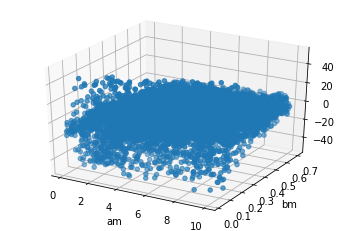

In [4]:
%matplotlib inline
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(X_partial.iloc[:,0], X_partial.iloc[:,1], y_train_partial, marker='o')
ax4.set_xlabel('am')
ax4.set_ylabel('bm')
plt.show()

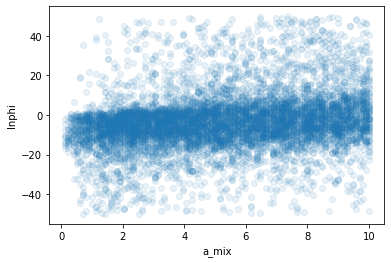

In [13]:
# Lnphi vs a_mix. lnphi bounded in [-50,50]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_partial.iloc[:,0], y_train_partial, alpha=0.1)
ax.set_xlabel('a_mix')
ax.set_ylabel('lnphi')
plt.show()

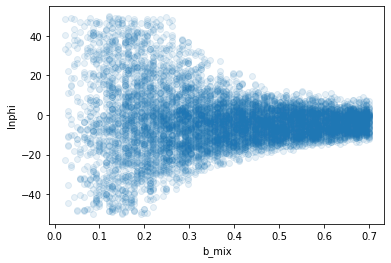

In [15]:
# Lnphi vs b_mix
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_partial.iloc[:,1], y_train_partial, alpha=0.1)
ax.set_xlabel('b_mix')
ax.set_ylabel('lnphi')
plt.show()

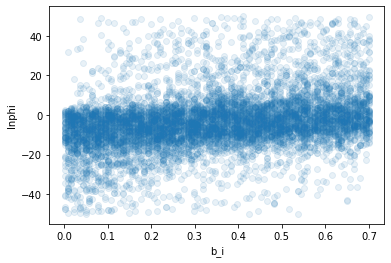

In [19]:
# Lnphi vs b_i
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_partial.iloc[:,2], y_train_partial, alpha=0.1)
ax.set_xlabel('b_i')
ax.set_ylabel('lnphi')
plt.show()

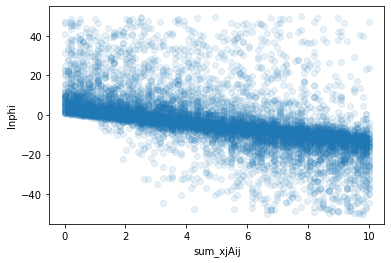

In [21]:
# Lnphi vs sum_xjAij
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_partial.iloc[:,3], y_train_partial, alpha=0.1)
ax.set_xlabel('sum_xjAij')
ax.set_ylabel('lnphi')
plt.show()

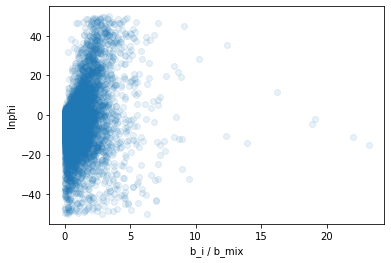

In [24]:
# Lnphi vs b_i/b_mix
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_partial.iloc[:,2]/X_partial.iloc[:,1], y_train_partial, alpha=0.1)
ax.set_xlabel('b_i / b_mix')
ax.set_ylabel('lnphi')
plt.show()

In [6]:
%%time
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(desc.drop(['lnphi'], axis=1))
pca.explained_variance_ratio

Wall time: 3min 12s


array([0.53385022, 0.4616415 ])

In [16]:
X_reduced_partial, X_reduced_test, y_train_partial, y_train_test = train_test_split(
            X_reduced, desc.loc[:,'lnphi'], test_size=0.9999, random_state=42)
print(X_reduced_partial.shape)
print(y_train_partial.shape)

(7710, 2)
(7710,)


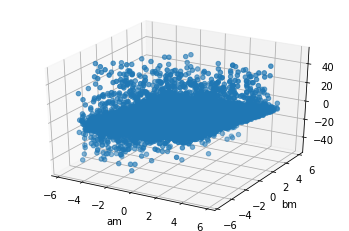

In [17]:
# Plots lnphi vs X1, X2 from PCA
%matplotlib inline
fig5 = plt.figure()
ax5 = fig5.add_subplot(111, projection='3d')
ax5.scatter(X_reduced_partial[:,0], X_reduced_partial[:,1], y_train_partial, marker='o')
ax5.set_xlabel('am')
ax5.set_ylabel('bm')
plt.show()

In [ ]:
desc.loc[['min','max'],:]

In [ ]:
f = pd.concat(d.iloc[:,i] for i in range(2,8))
f['b'] = f.describe()
f.loc['b'].rename('b')

In [ ]:
f['sum'] = pd.concat(d.iloc[:,i] for i in range(8,14)).describe()
f.loc['sum'].rename('sum')

In [ ]:
f['lnphi'] = pd.concat(d.iloc[:,i] for i in range(14,20)).describe()
f.loc['lnphi'].rename('lnphi')

In [ ]:
tot = d.loc[:,['a_mix', 'b_mix']].describe()
tot

In [ ]:
tot = pd.concat([tot, f.loc['b'].rename('b_i')], axis=1)
tot = pd.concat([tot, f.loc['sum'].rename('sum')], axis=1)
tot = pd.concat([tot, f.loc['lnphi'].rename('lnphi')], axis=1)
tot

In [ ]:
tot.T

In [ ]:
tot.loc[['min', 'max'],:]
